In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from imblearn.over_sampling import RandomOverSampler


In [ ]:
rain_df= pd.read_csv('weatherAUS.csv')
rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
rain_df.shape

(145460, 23)

In [ ]:
(rain_df.isnull().sum()*100)/(rain_df.shape[0])

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [ ]:
### let's remove the features where missing values are more than 10%
rain_df.drop(['Evaporation','Sunshine','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm'],axis=1,inplace=True)

In [ ]:
rain_df.shape

(145460, 17)

In [ ]:
(rain_df.isnull().sum()*100)/(rain_df.shape[0])

Date             0.000000
Location         0.000000
MinTemp          1.020899
MaxTemp          0.866905
Rainfall         2.241853
WindGustDir      7.098859
WindGustSpeed    7.055548
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     1.214767
WindSpeed3pm     2.105046
Humidity9am      1.824557
Humidity3pm      3.098446
Temp9am          1.214767
Temp3pm          2.481094
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [ ]:
rain_df.shape

(145460, 17)

In [ ]:
rain_df.dropna(axis=0,inplace=True)

In [ ]:
rain_df.shape

(121790, 17)

In [ ]:
(rain_df.isnull().sum()*100)/(rain_df.shape[0])

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [ ]:
rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No


In [ ]:
rain_df['Date']= pd.to_datetime(rain_df['Date'])
rain_df['Month']= rain_df['Date'].dt.month
rain_df['Year']= rain_df['Date'].dt.year

In [ ]:
rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No,12,2008


In [ ]:
###temporary purposes, let remove the following features: Temp9am, Temp3pm,Windspeed9am, WindSpeed3pm

rain_df_temp= rain_df.copy()
rain_df.drop(['Temp9am','Temp3pm','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm'],axis=1,inplace=True)

In [ ]:
rain_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'RainToday',
       'RainTomorrow', 'Month', 'Year'],
      dtype='object')

In [ ]:
rain_df['Average Temp']= (rain_df['MinTemp']+rain_df['MaxTemp'])/2
rain_df['Average Humidity']= (rain_df['Humidity9am']+rain_df['Humidity3pm'])/2
rain_df.drop(['MinTemp','MaxTemp','Humidity9am','Humidity3pm'],axis=1,inplace=True)

In [ ]:
rain_df.drop('Date',axis=1,inplace=True)

### Exploratory Data Analysis


In [ ]:
rain_df

,Location,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Month,Year,Average Temp,Average Humidity
0,Albury,0.6,W,44.0,No,No,12,2008,18.15,46.5
1,Albury,0.0,WNW,44.0,No,No,12,2008,16.25,34.5
2,Albury,0.0,WSW,46.0,No,No,12,2008,19.30,34.0
3,Albury,0.0,NE,24.0,No,No,12,2008,18.60,30.5
4,Albury,1.0,W,41.0,No,No,12,2008,24.90,57.5
...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,0.0,E,31.0,No,No,6,2017,12.65,43.0
145455,Uluru,0.0,E,31.0,No,No,6,2017,13.10,37.5
145456,Uluru,0.0,NNW,22.0,No,No,6,2017,14.45,38.5
145457,Uluru,0.0,N,37.0,No,No,6,2017,16.15,38.5


##### Location vs amount of rainfall

<BarContainer object of 47 artists>

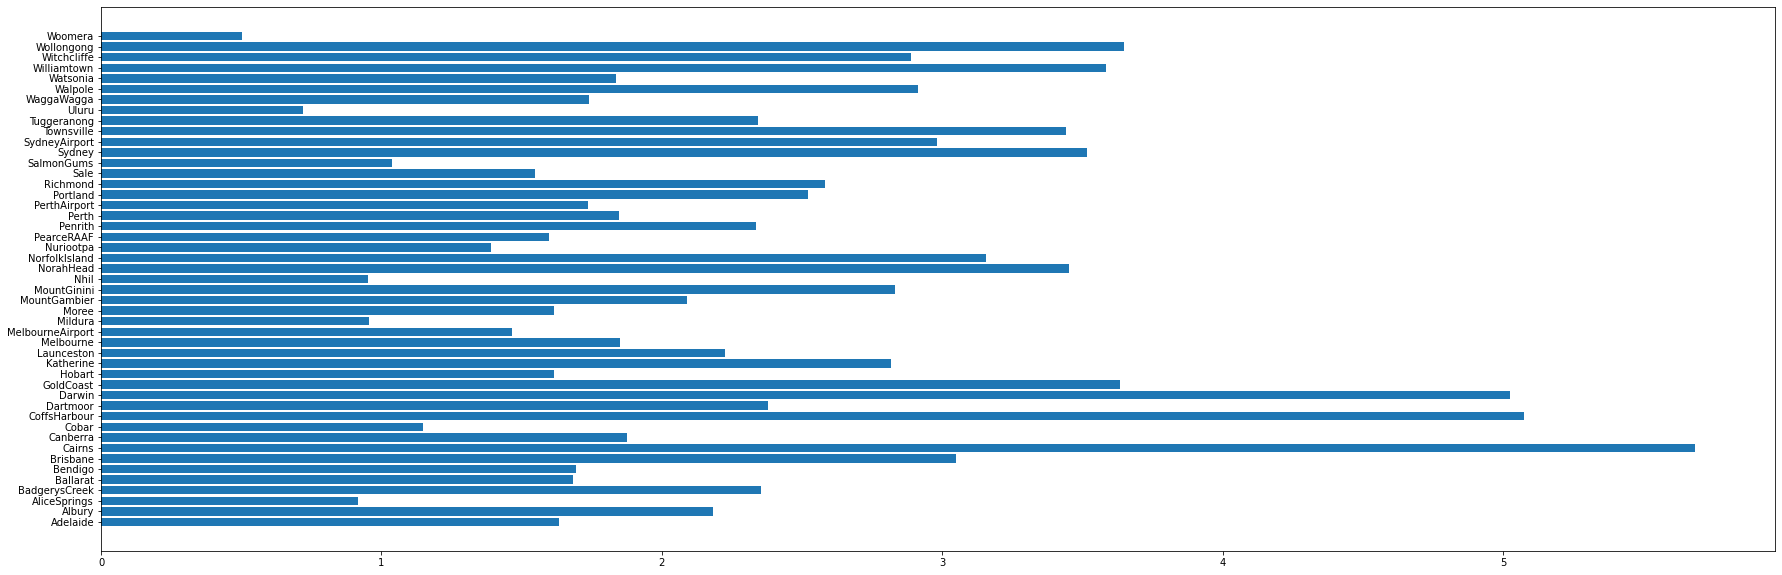

In [ ]:
plt.figure(figsize=(30,10))
location_df=rain_df.groupby('Location').aggregate({'Rainfall':'mean'})
plt.barh(y=location_df.index,width=location_df['Rainfall'])
#plt.ylabel('Location')
#plt.xlabel('Rainfall')
#plt.show()

<BarContainer object of 47 artists>

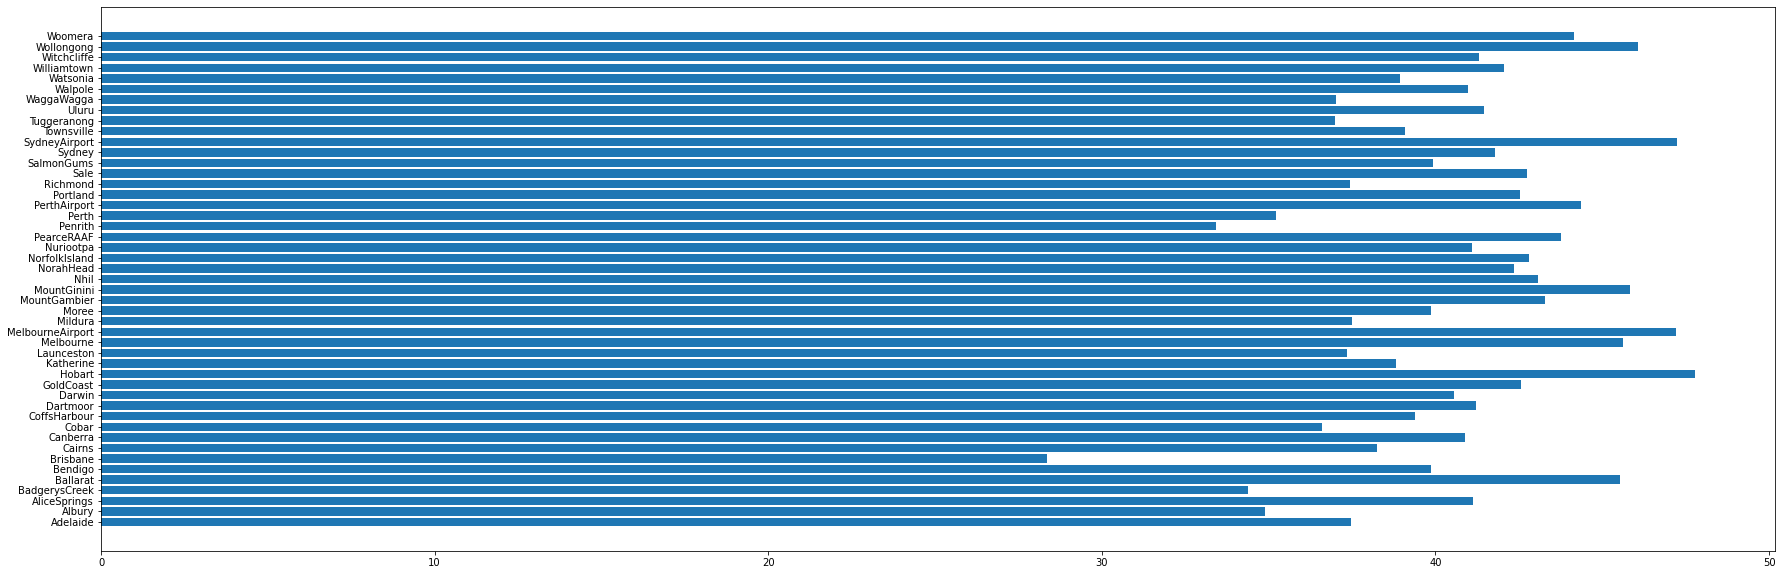

In [ ]:
plt.figure(figsize=(30,10))
location_df=rain_df.groupby('Location').aggregate({'WindGustSpeed':'mean'})
plt.barh(y=location_df.index,width=location_df['WindGustSpeed'])

In [ ]:
#raintommorow vs windspeed
rain_df.groupby('RainTomorrow').aggregate({'WindGustSpeed':'mean'})

,WindGustSpeed
RainTomorrow,
No,39.009588
Yes,46.606532


In [ ]:
### raintommorow vs average temperature
rain_df.groupby('RainTomorrow').aggregate({'Average Temp':'mean'})

,Average Temp
RainTomorrow,
No,18.100234
Yes,17.271556


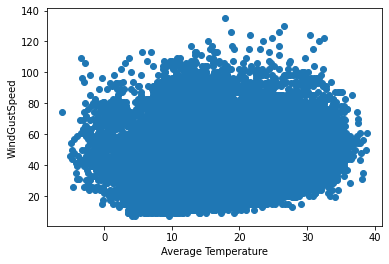

In [ ]:
#### temp vs windspeed
plt.scatter(data=rain_df,x='Average Temp',y='WindGustSpeed')
plt.xlabel('Average Temperature')
plt.ylabel('WindGustSpeed')
plt.show()

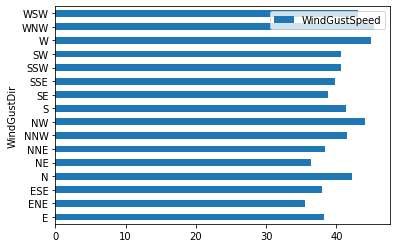

In [ ]:
### average windspeed for different wind directions
rain_df.groupby('WindGustDir').aggregate({'WindGustSpeed':'mean'}).plot(kind='barh')

In [ ]:
#study how much raintommorow would be there if there is raintoday 

rain_df.groupby('RainToday').aggregate({'RainTomorrow':'value_counts'})

RainTomorrow
RainToday RainTomorrow              
No        No                   80270
          Yes                  14267
Yes       No                   14636
          Yes                  12617

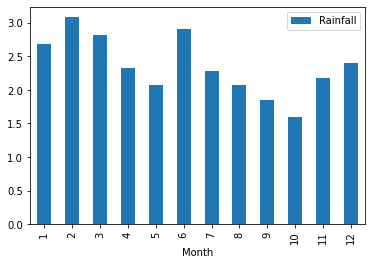

In [ ]:
rain_df.groupby('Month').aggregate({'Rainfall':'mean'}).plot(kind='bar')

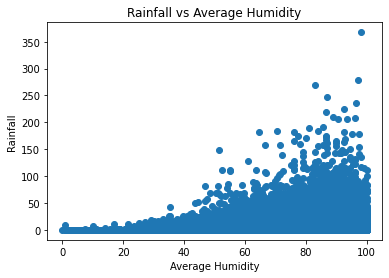

In [ ]:
plt.scatter(rain_df['Average Humidity'],rain_df['Rainfall'])
plt.ylabel('Rainfall')
plt.xlabel('Average Humidity')
plt.title('Rainfall vs Average Humidity')
plt.show()

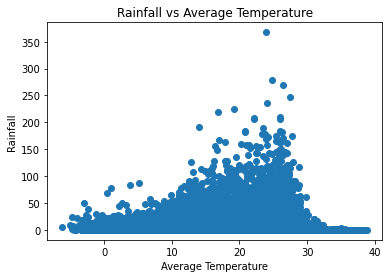

In [ ]:
plt.scatter(rain_df['Average Temp'],rain_df['Rainfall'])
plt.ylabel('Rainfall')
plt.xlabel('Average Temperature')
plt.title('Rainfall vs Average Temperature')
plt.show() 

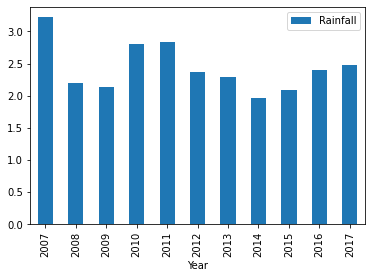

In [ ]:
rain_df.groupby('Year').aggregate({'Rainfall':'mean'}).plot(kind='bar')

In [ ]:
rain_df_lr_model= rain_df.copy()

In [ ]:
rain_df_lr_model.shape

(121790, 10)

In [ ]:
def outlier_removal(df,column):
  Q1= df[column].quantile(0.25)
  Q3= df[column].quantile(0.75)
  IQR= Q3-Q1
  max_1= Q3+(1.5*IQR)
  min_1= Q1-(1.5*IQR)
  df= df[(df[column]>min_1) &(df[column]<max_1)]
  return df


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


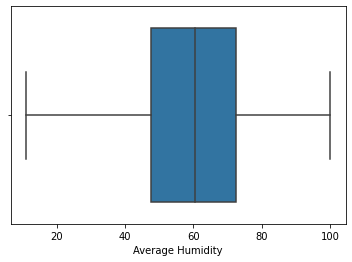

In [ ]:
#### boxplot of relative humidity
rain_df_lr_model= outlier_removal(rain_df_lr_model,'Average Humidity')
sb.boxplot(rain_df_lr_model['Average Humidity'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


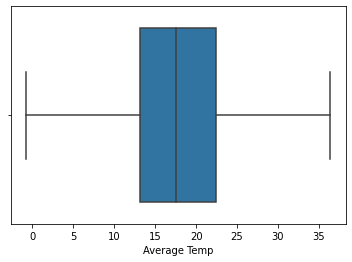

In [ ]:
rain_df_lr_model= outlier_removal(rain_df_lr_model,'Average Temp')
sb.boxplot(rain_df_lr_model['Average Temp'])
plt.show()


In [ ]:
rain_df_lr_model.shape

(121004, 10)

### Feature Engineering

In [ ]:
#### remove features where average humidity ==0 (as this cannot be attained)
rain_df_lr_model= rain_df_lr_model[rain_df_lr_model['Average Humidity']>0]

In [ ]:
#### encode all features
rain_df_lr_model.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Month,Year,Average Temp,Average Humidity
0,Albury,0.6,W,44.0,No,No,12,2008,18.15,46.5
1,Albury,0.0,WNW,44.0,No,No,12,2008,16.25,34.5
2,Albury,0.0,WSW,46.0,No,No,12,2008,19.30,34.0
3,Albury,0.0,NE,24.0,No,No,12,2008,18.60,30.5
4,Albury,1.0,W,41.0,No,No,12,2008,24.90,57.5


In [ ]:
#encode the RainToday , RainTommorow to 0, 1
rain_df_lr_model['RainToday']= np.where(rain_df_lr_model['RainToday']=='Yes',1,0)
rain_df_lr_model['RainTomorrow']= np.where(rain_df_lr_model['RainTomorrow']=='Yes',1,0)
rain_df_lr_model.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Month,Year,Average Temp,Average Humidity
0,Albury,0.6,W,44.0,0,0,12,2008,18.15,46.5
1,Albury,0.0,WNW,44.0,0,0,12,2008,16.25,34.5
2,Albury,0.0,WSW,46.0,0,0,12,2008,19.30,34.0
3,Albury,0.0,NE,24.0,0,0,12,2008,18.60,30.5
4,Albury,1.0,W,41.0,0,0,12,2008,24.90,57.5


In [ ]:
#one hot encode all the other categorical features
df_location= pd.get_dummies(rain_df_lr_model['Location'],drop_first=True)
df_winddir= pd.get_dummies(rain_df_lr_model['WindGustDir'],drop_first=True)

#concat the features
rain_df_lr_model= pd.concat([rain_df_lr_model,df_location,df_winddir],axis=1)
rain_df_lr_model.drop(['Location','WindGustDir'],axis=1,inplace=True)

In [ ]:
rain_df_lr_model.head()

,Rainfall,WindGustSpeed,RainToday,RainTomorrow,Month,Year,Average Temp,Average Humidity,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.6,44.0,0,0,12,2008,18.15,46.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.0,44.0,0,0,12,2008,16.25,34.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.0,46.0,0,0,12,2008,19.30,34.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,24.0,0,0,12,2008,18.60,30.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1.0,41.0,0,0,12,2008,24.90,57.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
rain_df_lr_model.shape

(121004, 69)

In [ ]:
#convert the features into independdent and dependent features
X= rain_df_lr_model.drop(['Rainfall','RainTomorrow'],axis=1)  #as rainfall parameter is the continous parameter of RainToday
y= rain_df_lr_model['RainTomorrow']


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)

In [ ]:
train_oversample= RandomOverSampler(sampling_strategy=0.5)
X_train,y_train= train_oversample.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

0    65934
1    32967
Name: RainTomorrow, dtype: int64

In [ ]:
y_test.value_counts()

0    28259
1     8043
Name: RainTomorrow, dtype: int64

In [ ]:
#standerize all the continous features
from sklearn.preprocessing import StandardScaler
sc_scaler= StandardScaler()
X_train[['WindGustSpeed','Average Temp','Average Humidity']]= sc_scaler.fit_transform(X_train[['WindGustSpeed','Average Temp','Average Humidity']])
X_test[['WindGustSpeed','Average Temp','Average Humidity']]= sc_scaler.transform(X_test[['WindGustSpeed','Average Temp','Average Humidity']])


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression()
lr_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred= lr_model.predict(X_test)
y_prob= lr_model.predict_proba(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,roc_auc_score
print(f'The accuracy of logistic regression test data is {accuracy_score(y_test,y_pred)}')
print(f'The accuracy of logistic regression train data is {accuracy_score(y_train,lr_model.predict(X_train))}')

The accuracy of logistic regression test data is 0.8225717591317283
The accuracy of logistic regression train data is 0.790709901821013


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


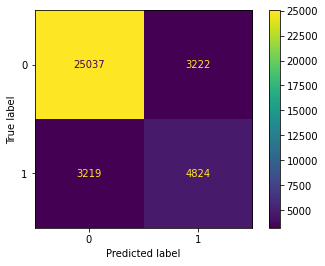

In [ ]:
#plot the confusion matrix
plot_confusion_matrix(lr_model,X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     28259
           1       0.60      0.60      0.60      8043

    accuracy                           0.82     36302
   macro avg       0.74      0.74      0.74     36302
weighted avg       0.82      0.82      0.82     36302



In [ ]:
print(f'The auc score is {roc_auc_score(y_test,y_prob[:,1])}')

The auc score is 0.8383270189196848


#### Since it is nearly a imbalanced dataset, we can utlise the precision, recall parameters as metrics for comparing the models.
I just tested it for linear regression from which i could find that precision seems to be good, where recall is 60% for the Yes case

Auc area score is 84%

In [ ]:
#### testing the logistic algorithm again......
# check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_detector(X):
  vif_df= pd.DataFrame()
  vif_df['Feature']= X.columns
  vif_df['VIF']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
  return vif_df

vif_df= vif_detector(X_train)
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Feature,VIF
0,WindGustSpeed,1.280173
1,RainToday,1.847837
2,Month,4.971144
3,Year,66.053984
4,Average Temp,2.042825
...,...,...
62,SSW,2.144544
63,SW,2.139593
64,W,2.340915
65,WNW,2.095823


In [ ]:
X_train.drop(['Year'],axis=1,inplace=True)
X_test.drop(['Year'],axis=1,inplace=True)
vif_df= vif_detector(X_train)
vif_df

,Feature,VIF
0,WindGustSpeed,1.264767
1,RainToday,1.827395
2,Month,4.730440
3,Average Temp,2.031214
4,Average Humidity,1.888385
...,...,...
61,SSW,1.865114
62,SW,1.816788
63,W,1.985049
64,WNW,1.806467


(array([  462.,  1976., 11520., 22459., 25371., 23506., 18887., 12211.,
         4076.,   536.]),
 array([-0.8 ,  2.92,  6.64, 10.36, 14.08, 17.8 , 21.52, 25.24, 28.96,
        32.68, 36.4 ]),
 <a list of 10 Patch objects>)

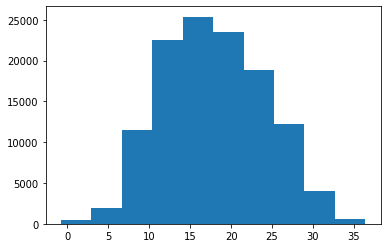

In [ ]:
plt.hist(X['Average Temp'])

(array([ 2428.,  4541.,  8119., 13416., 18302., 24394., 21712., 15695.,
         8714.,  3683.]),
 array([ 11. ,  19.9,  28.8,  37.7,  46.6,  55.5,  64.4,  73.3,  82.2,
         91.1, 100. ]),
 <a list of 10 Patch objects>)

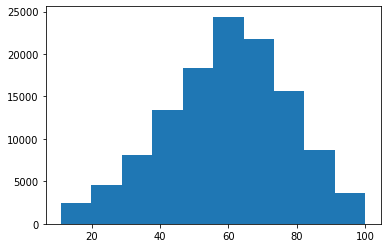

In [ ]:
plt.hist(X['Average Humidity'])

(array([3.0630e+03, 3.1179e+04, 4.9101e+04, 2.5902e+04, 8.2130e+03,
        2.7330e+03, 6.2300e+02, 1.5900e+02, 2.5000e+01, 6.0000e+00]),
 array([  7. ,  19.8,  32.6,  45.4,  58.2,  71. ,  83.8,  96.6, 109.4,
        122.2, 135. ]),
 <a list of 10 Patch objects>)

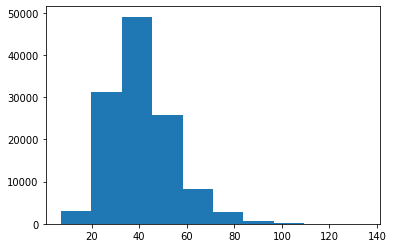

In [ ]:
plt.hist(X['WindGustSpeed'])

(array([   38.,   357.,  1420.,  5495., 26932., 37966., 37037.,  9871.,
         1775.,   113.]),
 array([2.07944154, 2.36276288, 2.64608421, 2.92940554, 3.21272688,
        3.49604821, 3.77936955, 4.06269088, 4.34601222, 4.62933355,
        4.91265489]),
 <a list of 10 Patch objects>)

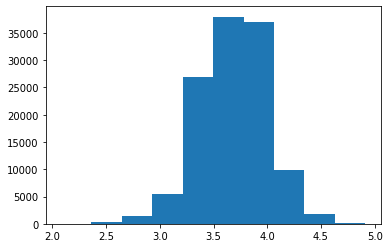

In [ ]:
X['log_WindGustSpeed']= np.log(X['WindGustSpeed']+1)
plt.hist(X['log_WindGustSpeed'])

In [ ]:
X.drop(['WindGustSpeed','Year'],axis=1,inplace=True)

In [ ]:
X.drop('Month',axis=1,inplace=True)

In [ ]:
X

,RainToday,Average Temp,Average Humidity,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,log_WindGustSpeed
0,0,18.15,46.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.806662
1,0,16.25,34.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.806662
2,0,19.30,34.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.850148
3,0,18.60,30.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.218876
4,0,24.90,57.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.737670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0,12.65,43.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.465736
145455,0,13.10,37.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.465736
145456,0,14.45,38.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3.135494
145457,0,16.15,38.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.637586


In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)

In [ ]:
train_oversample= RandomOverSampler(sampling_strategy=0.5)
X_train,y_train= train_oversample.fit_resample(X_train,y_train)

In [ ]:
sc_scaler= StandardScaler()
X_train[['log_WindGustSpeed','Average Temp','Average Humidity']]= sc_scaler.fit_transform(X_train[['log_WindGustSpeed','Average Temp','Average Humidity']])
X_test[['log_WindGustSpeed','Average Temp','Average Humidity']]= sc_scaler.transform(X_test[['log_WindGustSpeed','Average Temp','Average Humidity']])



In [ ]:
lr_clf= LogisticRegression()
lr_clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


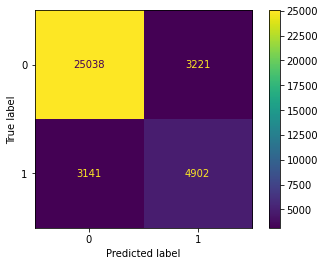

In [ ]:
plot_confusion_matrix(lr_clf,X_test,y_test)

In [ ]:
y_pred= lr_clf.predict(X_test)
print(f'The accuracy of logistic regression test data is {accuracy_score(y_test,y_pred)}')
print(f'The accuracy of logistic regression train data is {accuracy_score(y_train,lr_clf.predict(X_train))}')

The accuracy of logistic regression test data is 0.8247479477714726
The accuracy of logistic regression train data is 0.7963215740993519


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     28259
           1       0.60      0.61      0.61      8043

    accuracy                           0.82     36302
   macro avg       0.75      0.75      0.75     36302
weighted avg       0.83      0.82      0.83     36302



In [ ]:
print(roc_auc_score(y_test,lr_clf.predict_proba(X_test)[:,1]))

0.8458288556822291


### Even after feature transformation, there is a little improvement , need to try another algorithm

### SVC Classifier

In [ ]:
from sklearn.svm import SVC
rain_svc= rain_df.copy()


rain_svc=rain_svc[rain_svc['Average Humidity']>0]
rain_svc['RainToday']= np.where(rain_svc['RainToday']=='Yes',1,0)
rain_svc['RainTomorrow']= np.where(rain_svc['RainTomorrow']=='Yes',1,0)
#one hot encode all the other categorical features
df_location= pd.get_dummies(rain_svc['Location'],drop_first=True)
df_winddir= pd.get_dummies(rain_svc['WindGustDir'],drop_first=True)

#concat the features
rain_svc= pd.concat([rain_svc,df_location,df_winddir],axis=1)
rain_svc.drop(['Location','WindGustDir'],axis=1,inplace=True)
rain_svc= outlier_removal(rain_svc,'Average Humidity')
rain_svc= outlier_removal(rain_svc,'Average Temp')
rain_svc= outlier_removal(rain_svc,'WindGustSpeed')
X= rain_svc.drop(['Rainfall','Year','RainTomorrow','Month'],axis=1)  #as rainfall parameter is the continous parameter of RainToday
y= rain_svc['RainTomorrow']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
train_oversample= RandomOverSampler(sampling_strategy=0.5)
X_train,y_train= train_oversample.fit_resample(X_train,y_train)
sc_scaler= StandardScaler()
X_train[['WindGustSpeed','Average Temp','Average Humidity']]= sc_scaler.fit_transform(X_train[['WindGustSpeed','Average Temp','Average Humidity']])
X_test[['WindGustSpeed','Average Temp','Average Humidity']]= sc_scaler.transform(X_test[['WindGustSpeed','Average Temp','Average Humidity']])

In [ ]:
svc_clf= SVC()
svc_clf.fit(X_train,y_train)
y_pred_svc= svc_clf.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


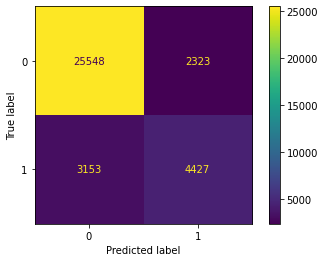

In [ ]:
from sklearn.metrics import roc_auc_score,classification_report,plot_confusion_matrix
plot_confusion_matrix(svc_clf,X_test,y_test)

In [ ]:
roc_auc_score(y_test,y_pred_svc)

0.7503443280761375

In [ ]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     27871
           1       0.66      0.58      0.62      7580

    accuracy                           0.85     35451
   macro avg       0.77      0.75      0.76     35451
weighted avg       0.84      0.85      0.84     35451



# KNN Classifier

In [ ]:
#feature engg
rain_knn= rain_df.copy()
rain_knn=rain_knn[rain_knn['Average Humidity']>0]
rain_knn['RainToday']= np.where(rain_knn['RainToday']=='Yes',1,0)
rain_knn['RainTomorrow']= np.where(rain_knn['RainTomorrow']=='Yes',1,0)
#one hot encode all the other categorical features
df_location= pd.get_dummies(rain_knn['Location'],drop_first=True)
df_winddir= pd.get_dummies(rain_knn['WindGustDir'],drop_first=True)

#concat the features
rain_knn= pd.concat([rain_knn,df_location,df_winddir],axis=1)
rain_knn.drop(['Location','WindGustDir'],axis=1,inplace=True)
#rain_knn= outlier_removal(rain_knn,'Average Humidity')
#rain_knn= outlier_removal(rain_knn,'Average Temp')
#rain_knn= outlier_removal(rain_knn,'WindGustSpeed')
X= rain_knn.drop(['Rainfall','Year','RainTomorrow','Month'],axis=1)  #as rainfall parameter is the continous parameter of RainToday
y= rain_knn['RainTomorrow']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
train_oversample= RandomOverSampler(sampling_strategy=0.5)
X_train,y_train= train_oversample.fit_resample(X_train,y_train)
sc_scaler= StandardScaler()
X_train[['WindGustSpeed','Average Temp','Average Humidity']]= sc_scaler.fit_transform(X_train[['WindGustSpeed','Average Temp','Average Humidity']])
X_test[['WindGustSpeed','Average Temp','Average Humidity']]= sc_scaler.transform(X_test[['WindGustSpeed','Average Temp','Average Humidity']])

In [ ]:
#applying knn model
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


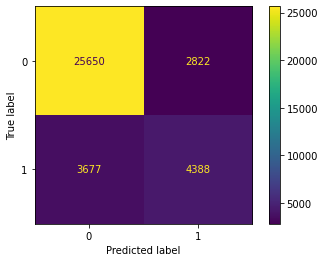

In [ ]:
from sklearn.metrics import plot_confusion_matrix
y_pred= knn_clf.predict(X_test)
y_prob= knn_clf.predict_proba(X_test)
plot_confusion_matrix(knn_clf,X_test,y_test)

In [ ]:
from sklearn.metrics import roc_auc_score,classification_report
roc_auc_score(y_test,y_prob[:,1])

0.821776681176595

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     28472
           1       0.61      0.54      0.57      8065

    accuracy                           0.82     36537
   macro avg       0.74      0.72      0.73     36537
weighted avg       0.82      0.82      0.82     36537



In [ ]:
## doing a grid search
from sklearn.model_selection import RandomizedSearchCV
knn_clf= KNeighborsClassifier()
parameters= {'n_neighbors':[10,40,50,100,120,150,200],'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'metric':['manhattan','euclidean'],'p':[1,2]}
knn_grid_model= RandomizedSearchCV(estimator=knn_clf,param_distributions=parameters,scoring='f1',cv=5,return_train_score=True,verbose=10,error_score=0,n_iter=5)
knn_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START algorithm=auto, metric=euclidean, n_neighbors=100, p=2, weights=uniform
[CV 1/5; 1/5] END algorithm=auto, metric=euclidean, n_neighbors=100, p=2, weights=uniform;, score=(train=0.654, test=0.647) total time=  43.8s
[CV 2/5; 1/5] START algorithm=auto, metric=euclidean, n_neighbors=100, p=2, weights=uniform
[CV 2/5; 1/5] END algorithm=auto, metric=euclidean, n_neighbors=100, p=2, weights=uniform;, score=(train=0.655, test=0.648) total time=  34.9s
[CV 3/5; 1/5] START algorithm=auto, metric=euclidean, n_neighbors=100, p=2, weights=uniform
[CV 3/5; 1/5] END algorithm=auto, metric=euclidean, n_neighbors=100, p=2, weights=uniform;, score=(train=0.652, test=0.642) total time=  34.9s
[CV 4/5; 1/5] START algorithm=auto, metric=euclidean, n_neighbors=100, p=2, weights=uniform
[CV 4/5; 1/5] END algorithm=auto, metric=euclidean, n_neighbors=100, p=2, weights=uniform;, score=(train=0.653, test=0.647) total time=  35.5s


In [ ]:
knn_grid_model.best_params_

In [ ]:
knn_grid_model.best_score_

In [ ]:
knn_clf= KNeighborsClassifier(algorithm='auto',metric= 'euclidean',n_neighbors= 40,p= 2,weights= 'distance')
knn_clf.fit(X_train,y_train)
y_pred= knn_clf.predict(X_test)
y_prob= knn_clf.predict_proba(X_test)


In [ ]:
plot_confusion_matrix(knn_clf,X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print(roc_auc_score(y_test,y_prob[:,1]))

### even after grid search for knn, model did not gives us expected results than logistic regression (modified)

#### Random Forest Classifier

In [ ]:
rain_df

,Location,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Month,Year,Average Temp,Average Humidity
0,Albury,0.6,W,44.0,No,No,12,2008,18.15,46.5
1,Albury,0.0,WNW,44.0,No,No,12,2008,16.25,34.5
2,Albury,0.0,WSW,46.0,No,No,12,2008,19.30,34.0
3,Albury,0.0,NE,24.0,No,No,12,2008,18.60,30.5
4,Albury,1.0,W,41.0,No,No,12,2008,24.90,57.5
...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,0.0,E,31.0,No,No,6,2017,12.65,43.0
145455,Uluru,0.0,E,31.0,No,No,6,2017,13.10,37.5
145456,Uluru,0.0,NNW,22.0,No,No,6,2017,14.45,38.5
145457,Uluru,0.0,N,37.0,No,No,6,2017,16.15,38.5


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

rain_rf= rain_df.copy()
rain_rf=rain_rf[rain_rf['Average Humidity']>0]
rain_rf['RainToday']= np.where(rain_rf['RainToday']=='Yes',1,0)
rain_rf['RainTomorrow']= np.where(rain_rf['RainTomorrow']=='Yes',1,0)
rain_rf[['WindGustDir','Location']]= rain_rf[['WindGustDir','Location']].apply(le.fit_transform)
rain_rf= outlier_removal(rain_rf,'Average Humidity')
rain_rf= outlier_removal(rain_rf,'Average Temp')


In [ ]:
rain_rf

,Location,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Month,Year,Average Temp,Average Humidity
0,1,0.6,13,44.0,0,0,12,2008,18.15,46.5
1,1,0.0,14,44.0,0,0,12,2008,16.25,34.5
2,1,0.0,15,46.0,0,0,12,2008,19.30,34.0
3,1,0.0,4,24.0,0,0,12,2008,18.60,30.5
4,1,1.0,13,41.0,0,0,12,2008,24.90,57.5
...,...,...,...,...,...,...,...,...,...,...
145454,39,0.0,0,31.0,0,0,6,2017,12.65,43.0
145455,39,0.0,0,31.0,0,0,6,2017,13.10,37.5
145456,39,0.0,6,22.0,0,0,6,2017,14.45,38.5
145457,39,0.0,3,37.0,0,0,6,2017,16.15,38.5


In [ ]:
from sklearn.model_selection import train_test_split
X= rain_rf.drop(['Rainfall','RainTomorrow','Month','Year'],axis=1)
y= rain_rf['RainTomorrow']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
train_oversample= RandomOverSampler(sampling_strategy=0.5)
X_train,y_train= train_oversample.fit_resample(X_train,y_train)
rf_clf= RandomForestClassifier(random_state=1)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred= rf_clf.predict(X_test)
y_prob= rf_clf.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


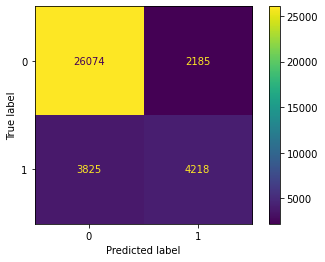

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(rf_clf,X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     28259
           1       0.66      0.52      0.58      8043

    accuracy                           0.83     36302
   macro avg       0.77      0.72      0.74     36302
weighted avg       0.82      0.83      0.83     36302



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
cv=5
estimator= RandomForestClassifier(random_state=1)
param= {'n_estimators':[i for i in range(100,1500,400)],'criterion':['gini', 'entropy'],'max_depth':[3,5,8,10,20],'min_samples_leaf':[i for i in range(100,400,50)]}
random_rf_model= RandomizedSearchCV(estimator=estimator,param_distributions=param,cv=cv,scoring='recall',n_iter=15,verbose=10,error_score=0,return_train_score=True,random_state=1)
random_rf_model.fit(X_train,y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START criterion=entropy, max_depth=20, min_samples_leaf=250, n_estimators=100
[CV 1/5; 1/15] END criterion=entropy, max_depth=20, min_samples_leaf=250, n_estimators=100;, score=(train=0.576, test=0.563) total time=   9.8s
[CV 2/5; 1/15] START criterion=entropy, max_depth=20, min_samples_leaf=250, n_estimators=100
[CV 2/5; 1/15] END criterion=entropy, max_depth=20, min_samples_leaf=250, n_estimators=100;, score=(train=0.571, test=0.568) total time=   6.0s
[CV 3/5; 1/15] START criterion=entropy, max_depth=20, min_samples_leaf=250, n_estimators=100
[CV 3/5; 1/15] END criterion=entropy, max_depth=20, min_samples_leaf=250, n_estimators=100;, score=(train=0.577, test=0.564) total time=   6.0s
[CV 4/5; 1/15] START criterion=entropy, max_depth=20, min_samples_leaf=250, n_estimators=100
[CV 4/5; 1/15] END criterion=entropy, max_depth=20, min_samples_leaf=250, n_estimators=100;, score=(train=0.571, test=0.575) total time

RandomizedSearchCV(cv=5, error_score=0,
                   estimator=RandomForestClassifier(random_state=1), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 8, 10, 20],
                                        'min_samples_leaf': [100, 150, 200, 250,
                                                             300, 350],
                                        'n_estimators': [100, 500, 900, 1300]},
                   random_state=1, return_train_score=True, scoring='recall',
                   verbose=10)

In [ ]:
random_rf_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 100,
 'n_estimators': 900}

In [ ]:
rf_model= RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_leaf=100,n_estimators=900,random_state=1)
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=100,
                       n_estimators=900, random_state=1)

In [ ]:
y_pred=rf_model.predict(X_test) 
y_prob= rf_model.predict_proba(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.827915817310341


In [ ]:
y_trainpred= rf_model.predict(X_train)
print(accuracy_score(y_train,y_trainpred))

0.801377134710468


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


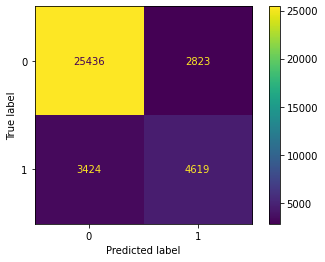

In [ ]:
plot_confusion_matrix(rf_model,X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     28259
           1       0.62      0.57      0.60      8043

    accuracy                           0.83     36302
   macro avg       0.75      0.74      0.74     36302
weighted avg       0.82      0.83      0.83     36302



#### Random Forest classifier was almost nearer to the results of logistic regression 

### Adaboost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf=AdaBoostClassifier(n_estimators=100,random_state=1,learning_rate=1.5)
adaboost_clf.fit(X_train,y_train)




AdaBoostClassifier(learning_rate=1.5, n_estimators=100, random_state=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


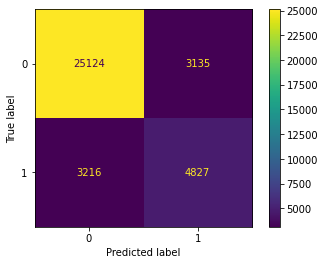

In [ ]:
y_pred= adaboost_clf.predict(X_test)
y_prob= adaboost_clf.predict_proba(X_test)
plot_confusion_matrix(adaboost_clf,X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     28259
           1       0.61      0.60      0.60      8043

    accuracy                           0.83     36302
   macro avg       0.75      0.74      0.75     36302
weighted avg       0.82      0.83      0.82     36302



In [ ]:
### let's do the grid search of adaboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
estimator_model= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0),random_state=1)
parameters= {'base_estimator__max_depth':[2,3,4,5,6,7,8],'learning_rate':[0.2,0.6,0.8,1.0,1.5,2,2.5],'n_estimators':[200,400,600,800,1000]}
random_model_clf= RandomizedSearchCV(estimator=estimator_model,param_distributions=parameters,n_iter=6,scoring='f1',verbose=10,return_train_score=True,cv=5,error_score=0,random_state=1)
random_model_clf.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START base_estimator__max_depth=3, learning_rate=2.5, n_estimators=600
[CV 1/5; 1/6] END base_estimator__max_depth=3, learning_rate=2.5, n_estimators=600;, score=(train=0.285, test=0.292) total time= 1.3min
[CV 2/5; 1/6] START base_estimator__max_depth=3, learning_rate=2.5, n_estimators=600
[CV 2/5; 1/6] END base_estimator__max_depth=3, learning_rate=2.5, n_estimators=600;, score=(train=0.264, test=0.261) total time=  35.0s
[CV 3/5; 1/6] START base_estimator__max_depth=3, learning_rate=2.5, n_estimators=600
[CV 3/5; 1/6] END base_estimator__max_depth=3, learning_rate=2.5, n_estimators=600;, score=(train=0.335, test=0.330) total time=  50.2s
[CV 4/5; 1/6] START base_estimator__max_depth=3, learning_rate=2.5, n_estimators=600
[CV 4/5; 1/6] END base_estimator__max_depth=3, learning_rate=2.5, n_estimators=600;, score=(train=0.335, test=0.336) total time=  44.2s
[CV 5/5; 1/6] START base_estimator__max_depth=3, learnin

RandomizedSearchCV(cv=5, error_score=0,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                                                random_state=1),
                   n_iter=6,
                   param_distributions={'base_estimator__max_depth': [2, 3, 4,
                                                                      5, 6, 7,
                                                                      8],
                                        'learning_rate': [0.2, 0.6, 0.8, 1.0,
                                                          1.5, 2, 2.5],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=1, return_train_score=True, scoring='f1',
                   verbose=10)

In [ ]:
random_model_clf.best_score_

0.8356170281694976

In [ ]:
random_model_clf.best_params_

{'base_estimator__max_depth': 8, 'learning_rate': 0.6, 'n_estimators': 1000}

In [ ]:
adaboost_clf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,random_state=0),random_state=1,n_estimators=1000,learning_rate=0.6)
adaboost_clf.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                         random_state=0),
                   learning_rate=0.6, n_estimators=1000, random_state=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


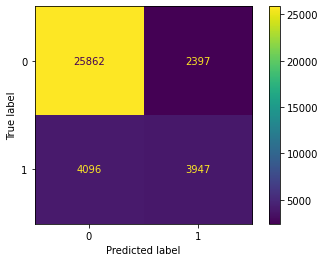

In [ ]:
y_pred= adaboost_clf.predict(X_test)
y_prob= adaboost_clf.predict_proba(X_test)
plot_confusion_matrix(adaboost_clf,X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     28259
           1       0.62      0.49      0.55      8043

    accuracy                           0.82     36302
   macro avg       0.74      0.70      0.72     36302
weighted avg       0.81      0.82      0.81     36302



### XGBoost classifier

In [ ]:
!pip install XGBoost

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

rain_boost= rain_df.copy()
rain_boost=rain_boost[rain_boost['Average Humidity']>0]
rain_boost['RainToday']= np.where(rain_boost['RainToday']=='Yes',1,0)
rain_boost['RainTomorrow']= np.where(rain_boost['RainTomorrow']=='Yes',1,0)
rain_boost[['WindGustDir','Location']]= rain_boost[['WindGustDir','Location']].apply(le.fit_transform)
rain_boost= outlier_removal(rain_boost,'Average Humidity')
rain_boost= outlier_removal(rain_boost,'Average Temp')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X= rain_boost.drop(['Rainfall','RainTomorrow','Month','Year'],axis=1)
y= rain_boost['RainTomorrow']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
train_oversample= RandomOverSampler(sampling_strategy=0.5)
X_train,y_train= train_oversample.fit_resample(X_train,y_train)
sc_scaler= StandardScaler()
X_train[['WindGustSpeed','Average Temp','Average Humidity']]= sc_scaler.fit_transform(X_train[['WindGustSpeed','Average Temp','Average Humidity']])
X_test[['WindGustSpeed','Average Temp','Average Humidity']]= sc_scaler.transform(X_test[['WindGustSpeed','Average Temp','Average Humidity']])

In [ ]:
xgb_clf= xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train)

XGBClassifier()

In [ ]:
y_pred= xgb_clf.predict(X_test)
y_prob= xgb_clf.predict_proba(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


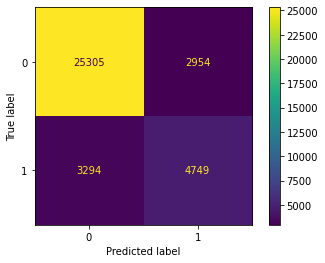

In [ ]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score
plot_confusion_matrix(xgb_clf,X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     28259
           1       0.62      0.59      0.60      8043

    accuracy                           0.83     36302
   macro avg       0.75      0.74      0.75     36302
weighted avg       0.83      0.83      0.83     36302



#### Logistics Regressions seems to have better results after transforming the features

#### SVC classifier seems to have good precision values for positive classes but less recall values 

#### KNN classifier is also seems to be performing but not much performing better than logistic regression

#### RandomForest Classifier seems to be not performing better than logistic regression

#### Adaboost classifier seems to have same results as the logistic regression

#### Xgboost seems to be performing not better than others.....